# Telco customer churn analysis and its Impact using Customer lifetime value

Authors: Aaron Pereira, Bhagyashree Soni & Pushkar Salvi

Our goal in this project is to identify trends in customer churn at a telecom company. The data contains 3,333 observations and 23 variables for Telco customers. It contains demographic as well as usage data of various customers. By Analysing the data and gaining insights we will be predicting which customers are likely to churn. Also, using Customer lifetime value we will be estimating the impact of the churn.

Data source: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data


In [1]:
import pandas as pd 
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import itertools
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn. ensemble import RandomForestClassifier 

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix
from IPython.display import Image

In [2]:
data = pd.read_csv('./Telco_Churn.csv')

In [3]:
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Column description:

    1) state: Two character of State code of the customer
    2) account_length: Tenure or no. months of the account
    3) area_code: 3 digit telephone area code
    4) phone_number: phone number of the customer excluding the area code
    5) international_plan: (Yes or No) if the customer has enrolled for international plan
    6) voice_mail_plan: (Yes or No) if the customer has enrolled for voice mail plan
    7) number_vmail_message: Number of voice mail messages
    8) total_day_minutes: Average no. of day minutes per month
    9) total_day_calls: Average no. of day calls per month
    10)total_day_charges: Average Monthly charges of day calls
    11)total_eve_minutes: Average no. of evening minutes per month
    12)total_eve_calls: Average no. of evening calls per month
    13)total_eve_charges: Average Monthly charges of evening calls
    14)total_night_minutes: Average no. of night minutes per month
    15)total_night_calls: Average no. of night calls per month
    16)total_night_charges: Average Monthly charges of night calls
    17)total_intl_minutes: Average no. of international minutes per month
    18)total_intl_calls: Average no. of international calls per month
    19)total_intl_charges: Average Monthly charges of international calls
    20)customer_service_calls: No. of customer service calls made
    21)churn: (True or False) if the customer churned or no. 
    

**Data cleaning and modification**

**-------------------------------------------------------------------------------- Start of own code ----------------------------------------------------------------------------------------------------**

In [4]:
#Replacing (Yes,No) and (True,False) to 1 & 0 respectively
data.replace('no',0,inplace=True)
data.replace('yes',1,inplace=True)
data.loc[:,'churn']=data.churn.apply(lambda x:0 if x==int(False) else int(True))
data.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


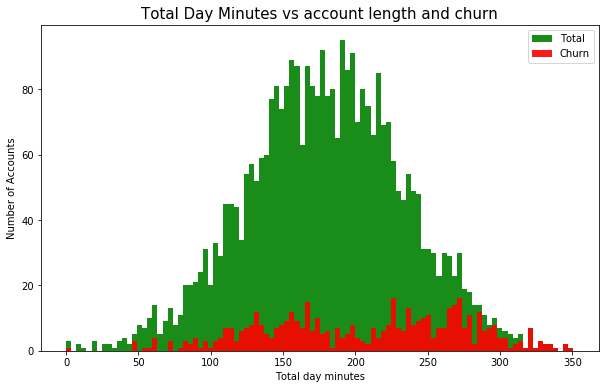

In [5]:
#Plot of Total day minutes and its relation with churn
plt.rcParams['figure.figsize'] = [10, 6]
plt.hist(data.total_day_minutes, bins= 100, color = 'Green',alpha=0.9, label='Total')
plt.hist(data.total_day_minutes[data['churn']==1], bins= 100,color='red',alpha=0.9, label='Churn')
plt.xlabel('Total day minutes', size=10);
plt.ylabel('Number of Accounts', size=10)
plt.title('Total Day Minutes vs account length and churn', size=15)
plt.legend()

Insight 1: The graph above shows the total day minutes customer communicates over the phone and how the churn rate is associated with it. We can see that there is a trend that as the number of minutes increases, the churn rate is also more. This means that isn't any reduction in call charges for higher call duration. 

Recommendation: The company could take this into consideration and offer attractive plan with low charges for higher minutes.

**Plot of no. of customer service calls to the churn**

Text(0.5,1,'customer_service_calls')

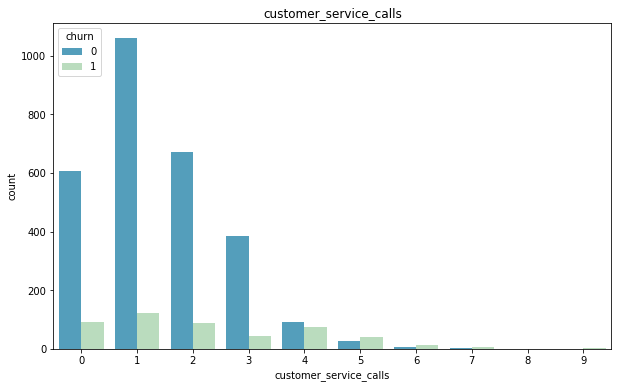

In [6]:
plt.figure()
plt.rcParams['figure.figsize'] = [12, 8]
sns.countplot(x=data['customer_service_calls'], hue=data["churn"], data=data, palette="GnBu_r");
plt.title('customer_service_calls')

**Ploting the Customer churn ratio vs the No. of customer calls**

Text(0,0.5,'Customer churn ratio')

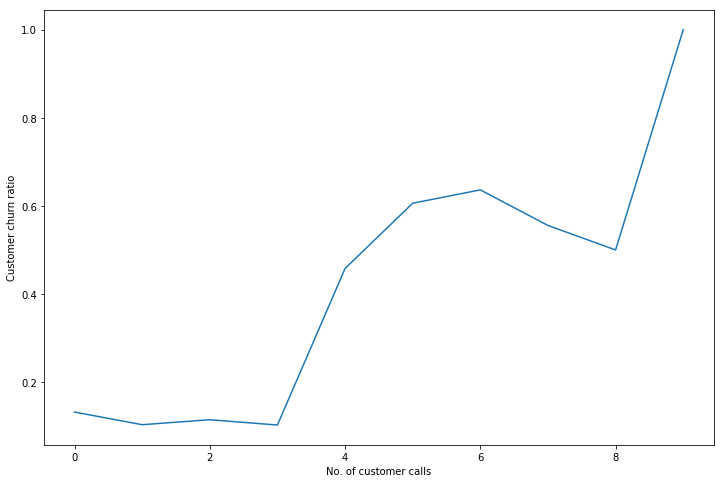

In [7]:
#created a list service_calls_ratio that will have the customer churn ratio for each value of customer service call
service_calls_ratio = list()
for i in range(data.customer_service_calls.nunique()):
    temp = data.where(data["customer_service_calls"]==i)
    temp.dropna(inplace=True)
    calls_churn_ratio = len(temp[temp["churn"]==1])/len(temp["churn"])
    del temp
    service_calls_ratio.append(calls_churn_ratio)

plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(service_calls_ratio)
plt.xlabel('No. of customer calls')
plt.ylabel('Customer churn ratio')

Insight 2: The graph above shows the churn ratio with respect to the no. of customer service call. It can be seen that after the 3rd call the probability of a customer to churn increases.

Recommendation: The company should perform some data analysis on customer service feedback after the call. Also, we need to have a special customer service representative to deal with the customers from the 2nd call and escalate this

**Plot of Customer churn vs Internation plan**

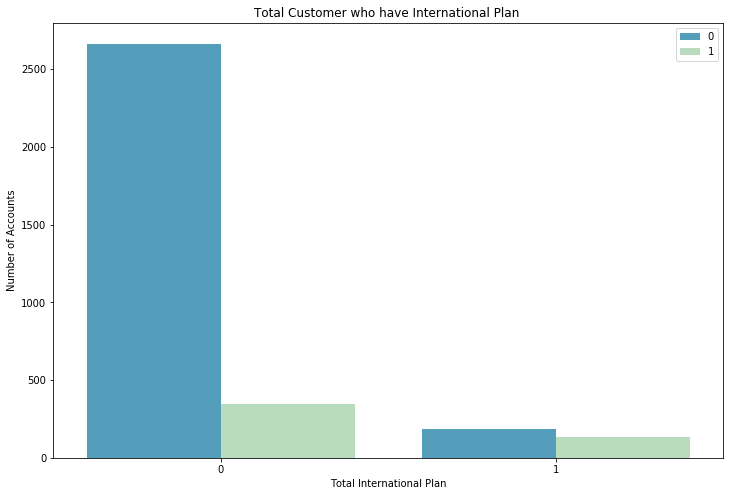

In [8]:
plt.figure()
plt.rcParams['figure.figsize'] = [12, 8]
sns.countplot(x='international_plan', hue="churn", data=data, palette="GnBu_r");
plt.title('Plot of Customer churn vs Internation plan')
plt.xlabel('Total International Plan');
plt.ylabel('Number of Accounts')
plt.title('Total Customer who have International Plan ', size=12)
plt.legend()

Insight 3: People having international plan churn more, maybe the service of international calls might be poor that forces the customers to leave. 
From the churn population 30% were the ones with international plan. And 42% of the customers with international plans churned.

Recomendation: Offer good the plans for the customer with international plans. Check call quality and customer feedback to improve.

**-------------------------------------------------------------------------------- End of own code ----------------------------------------------------------------------------------------------------**

# Customer Lifetime Value

** Customer Lifetime Value: The present value of the future cash flows attributed to the customer during his/her entire relationship with the company. It is knowning what an average customer is worth the business.**

**-------------------------------------------------------------------------------- Start of own code ----------------------------------------------------------------------------------------------------**

In [9]:
#Calculating the average monthly bill per customer
data["total_charge"] =  data["total_day_charge"]+data["total_eve_charge"]+data["total_night_charge"]+data["total_intl_charge"]
mean_monthly_bill = data["total_charge"].mean()
print('Average monthly bill per customer: $' + str(mean_monthly_bill))

Average monthly bill per customer: $59.44975397539747


In [10]:
#Average customer lifespan( in years) using the telco account_length(in months)
average_customer_lifespan = data['account_length'].mean()/12
print('Average customer lifespan: ' + str(average_customer_lifespan) + ' years')

Average customer lifespan: 8.422067206720671 years


In [11]:
#churn rate
churn_rate = (len(data[data['churn']==1]))/(len(data["churn"]))
print('Churn rate: ' + str(churn_rate))

Churn rate: 0.14491449144914492


In [12]:
#retention rate
retention_rate = 1 - churn_rate
print('Retention rate: ' + str(retention_rate))

Retention rate: 0.8550855085508551


In [13]:
#Profit margin
#The mean profit margin in the telecom companies was found to be 59.2% so we approximate it to 60% (i.e 0.6)
profit_margin = 0.6

Discount_rate: To calculate a fair discount rate we used the WACC (weighted average cost of capital) calculator. 

Reference: (http://www.pm.lth.se/fileadmin/pm/Exjobb/Filer_fram_till_foerra_aaret/Exjobb_2013/Flordahl___Friberg/CLV_ERICSSON_Flordal_Friberg.pdf). 

This metrics will be available within the company to apply in the model. But since this data is not available to us we will be using the mean WACC based on the country and the Telecom industry that is available from the site: http://www.waccexpert.com/ (6.81%)

In [14]:
discount_rate = 0.0681

Gross margin: Gross margin is the difference between revenue and cost of service divided by revenue.

In [15]:
#Average gross margin per customer lifespan (i.e ~ 8yrs)
gross_margin = profit_margin * (average_customer_lifespan * mean_monthly_bill *12)
print('Average gross margin: ' + str(gross_margin))

Average gross margin: 3604.9667285074092


Formula for Customer lifetime value referred from https://en.wikipedia.org/wiki/Customer_lifetime_value 

In [16]:
#Customer Lifetime value
lifetime_value = gross_margin *((retention_rate)/ (1+discount_rate - retention_rate))
print('Customer Lifetime value: $' + str(lifetime_value))

Customer Lifetime value: $14471.103760988011


At an annual churn rate of 0.1449 we need re-acquire 14.49(~15) customers for every 100 customer i.e to grow by 1 customer we need to acquire ~15 customers

Let us assume that Telco improves its churn rate by 2% i.e. the new churn_rate is churn_rate - 0.02. Let us see the impact of the customer lifetime value.

In [17]:
new_churn_rate = churn_rate - 0.02
new_retention_rate = 1 - new_churn_rate

In [18]:
#New Customer lifetime value is:
new_lifetime_value = gross_margin *((new_retention_rate)/ (1+discount_rate - new_retention_rate))
print('Customer Lifetime value: $' + str(new_lifetime_value))

Customer Lifetime value: $16344.13105067813


In [19]:
print('The difference in Customer lifetime value: $' + str(new_lifetime_value - lifetime_value))

The difference in Customer lifetime value: $1873.0272896901188


**This shows that even if we re acquire 2 customer out of the 14 churning we improve the customer lifetime value by $1873**

**-------------------------------------------------------------------------------- End of own code ----------------------------------------------------------------------------------------------------**

# Implementing Random Forest Algorithm on the data and finding features which are important in predicting churn.

From the dataset, we are first eliminating some attributes which are not contributing towards churn. The below part of the code is referenced from http://blog.keyrus.co.uk/a_simple_approach_to_predicting_customer_churn.html

**------------------------------------------------------------------------Start of referenced code--------------------------------------------------------------------------------------------------------**

**----------- referred from :http://blog.keyrus.co.uk/a_simple_approach_to_predicting_customer_churn.html -------------**

In [20]:
churn_data = data.drop(['phone_number','state','area_code'],axis=1)

Here, we are excluding total_charge as we are considering the individual day, evening and night charges, and churn as it is the label.
Then we are segregating the data into predicting variables and dependent variables.


In [21]:
x= churn_data.drop(['churn','total_charge'], axis =1) 
features= churn_data.drop(['churn','total_charge'],axis=1).columns

In [22]:
y = churn_data['churn']

We are then splitting the data into test and train datasets using stratified sampling.

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42, stratify= y)

In [24]:
RFC = RandomForestClassifier(n_estimators=30)
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
Accuracy = RFC.score(x_test, y_test)
print('Accuracy :',Accuracy )

Accuracy : 0.9430284857571214


**------------------- end of code referred from http://blog.keyrus.co.uk/a_simple_approach_to_predicting_customer_churn.html -----------------**

The below function is used to plot the ROC curve and the confusion matrix. The below section was refered from http://mydatadwaipayan.blogspot.com/2018/02/credit-card-defaulter-prediction.html and was used for one of the class assignments.

**-------------- Start of code referred from http://mydatadwaipayan.blogspot.com/2018/02/credit-card-defaulter-prediction.html -------------------------------------**

In [26]:
def plot_cm(ax, y_true, y_pred, classes, title, th=0.5, cmap=plt.cm.Blues):
    y_pred_labels = (y_pred>th).astype(int)
    
    cm = confusion_matrix(y_true, y_pred_labels)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

def plot_auc(ax, y_train, y_train_pred, y_test, y_test_pred, th=0.5):

    y_train_pred_labels = (y_train_pred>th).astype(int)
    y_test_pred_labels  = (y_test_pred>th).astype(int)

    fpr_train, tpr_train, _ = roc_curve(y_train,y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)
    acc_train = accuracy_score(y_train, y_train_pred_labels)

    fpr_test, tpr_test, _ = roc_curve(y_test,y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)
    acc_test = accuracy_score(y_test, y_test_pred_labels)

    ax.plot(fpr_train, tpr_train)
    ax.plot(fpr_test, tpr_test)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')
    
    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_train, roc_auc_train)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_test, roc_auc_test)
    ax.legend([train_text, test_text])

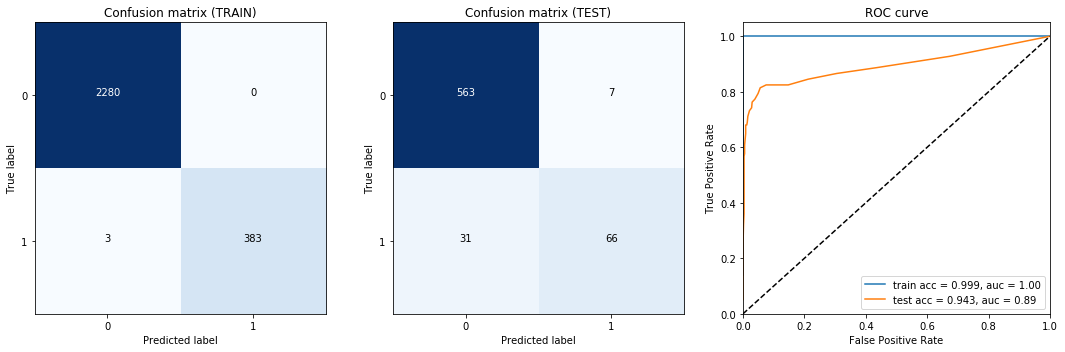

In [27]:
threshold = 0.5
y_train_pred = RFC.predict_proba(x_train)[:,1]
y_test_pred = RFC.predict_proba(x_test)[:,1]

fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)

plot_cm(ax[0],  y_train, y_train_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
plot_cm(ax[1],  y_test, y_test_pred,   [0,1], 'Confusion matrix (TEST)', threshold)
plot_auc(ax[2], y_train, y_train_pred, y_test, y_test_pred, threshold)
    
plt.tight_layout()
plt.show()

**------------------------------ end of code referred from http://mydatadwaipayan.blogspot.com/2018/02/credit-card-defaulter-prediction.html ------------------------**

Next, we are going to find the most important attributes which are responsible for churn. The graph below gives us the attributes which are affecting churn.

Reference for the below code: http://blog.keyrus.co.uk/a_simple_approach_to_predicting_customer_churn.html

**------------- Start of code referred from  http://blog.keyrus.co.uk/a_simple_approach_to_predicting_customer_churn.html ------------------**

In this block of code we are using the feature_importance feature of Random Forest Algorithm, the feature importance function gives us the attributes which it found were useful and important in predicting churn. It then plots these attributes in a form of a horizontal bar chart which diagramatically indicates which feature had how much importance in predicting churn.

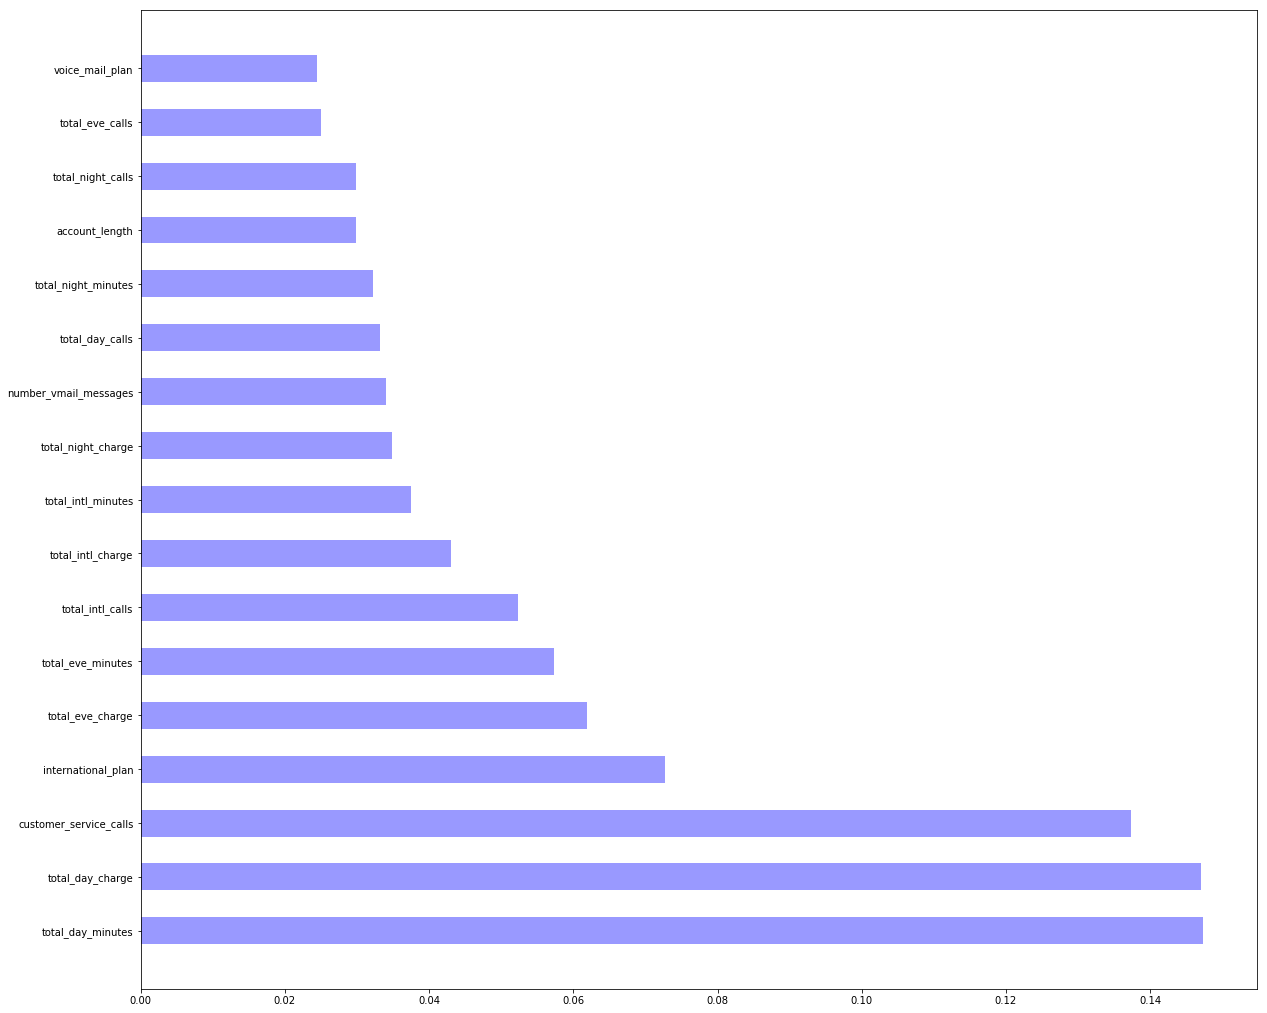

In [28]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

features_df = pd.DataFrame(RFC.feature_importances_, columns=["importance"])
features_df["labels"] = features
features_df.sort_values("importance", inplace=True, ascending=False)

index = np.arange(len(RFC.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , features_df["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, features_df["labels"])
plt.show()

**------------------------ End of code referred from  http://blog.keyrus.co.uk/a_simple_approach_to_predicting_customer_churn.html --------------**

Based on the above diagram, we can say that total_day_charge has the highest importance followed by total_day_minutes, customer_service_calls, international_plan and so on. This output is getting correlated to the exploratory data analysis which we did in the initial stages.

# SVM Classification

**-------------------------------------------------------------------------------- Start of own code ----------------------------------------------------------------------------------------------------**

In [29]:
data_corr = data.corr()

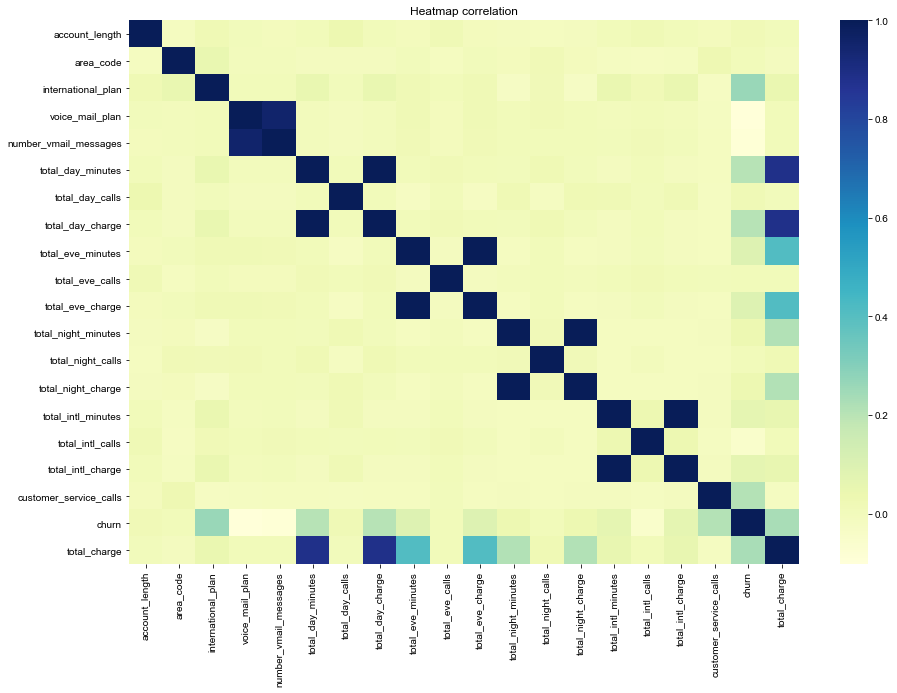

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(data_corr, cmap="YlGnBu")
sns.set(font_scale=1,style='white')

plt.title('Heatmap correlation')
plt.show()

As seen form the correlation diagram, we see that churn is affected by few of the attributes from the dataset.
High correlation is observed between some of these variables as they are more or less the same variables. So we will consider one of these variable pairs in our model and reduce the multicollinearity. In the next block, we are dropping these attributes which we feel are corelated to each other.

In [31]:
data_model = data.drop(['state','phone_number','account_length','area_code','number_vmail_messages','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','total_charge'],axis=1)

In [32]:
data_model.head()

,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,customer_service_calls,churn
0,0,1,265.1,110,197.4,99,244.7,91,10.0,3,1,0
1,0,1,161.6,123,195.5,103,254.4,103,13.7,3,1,0
2,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
3,1,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
4,1,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0


We have 3333 rows of data in our dataset. We are splitting the data into test and train sets. The data is already shuffled up and so we are considerig the first 2700 rows to select our training set.

In [33]:
df_train = data_model[0:2700] 

df_train_1 = df_train[df_train['churn'] == 1]  #Churn
df_train_0 = df_train[df_train['churn'] == 0]  #No Churn
no_of_churn_train = len(df_train_1)
print(str(no_of_churn_train) + ' churn records in our training dataset out of 2700 records.')

382 churn records in our training dataset out of 2700 records.


Since our dataset is biased (i.e there is only 14% of churn records), we will create a dataframe of 40%(churn) 60%(no churn) to feed to the model. As we have 382 records that result in churn, our total training dataset would contain 955 records. Out of which 382 would be churn records and 573 non churn records. We then merge the churn and non- churn records together and shuffle the records to get the train dataset.

In [34]:
df_sample = df_train_0.sample(573)

# We gather the churn with the no churn
df_train = df_train_1.append(df_sample) 

# Then we mix our dataset
df_train = df_train.sample(frac=1) 

From the train data set we now segregate the label and the features which affect the label.

In [35]:
X_train = df_train.drop(['churn'],axis=1) #drop label

y_train = df_train['churn'] # Label

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

Remaining records i.e 2700 onwards will be considered for the test dataset

In [36]:
df_test = data_model[2700:]

X_test = df_test.drop(['churn'],axis=1)
y_test = df_test['churn']
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

**---------------------------------------------------------------------- End of own code --------------------------------------------------------------------------------------------------**

Confusion Matrix

In [37]:
class_names=np.array(['0','1']) # Binary label, Class = 1 (churn) and Class = 0 (no churn)

We are using a function here to plot the confusion matrix created after running a model on the test - train dataset.
Reference link of the below function: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
This function will be called every time we run a model and then want to diagramatically show the confusion matrix created by this model.

**---------------------- Start of code referred from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html --------------------**

In [38]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**--------------------------- End of code referred from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html -----------------**

Applying SVM classsifier to train the model on the train dataset.

**------------------------------------------------------------------------ Start of own code ----------------------------------------------------------------------------------------------------**

In [39]:
classifier = svm.SVC(kernel='linear')

In [40]:
classifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Testing the model

In [41]:
prediction_SVM_all = classifier.predict(X_test)

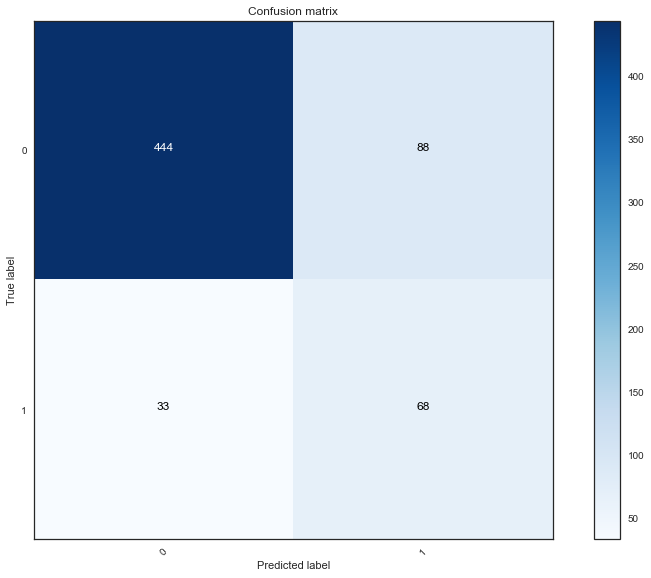

In [42]:
cm = confusion_matrix(y_test, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In this Matrix we cannot directly take into consideration the accuracy.
    During the remaining part of this study our criterion will consider precision on the real churn 5 times more important than the general accuracy. This is based on the study by Khalid Saleh(CEO and co-founder of Invesp) Reference: https://www.invespcro.com/blog/customer-acquisition-retention/

**The below block of code has been written by us based on the concepts learned in the class. **

In [43]:
print('Our accuracy based on the criterion above is ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 5 * cm[1][1]/(cm[1][0]+cm[1][1])) / 6))

Our accuracy based on the criterion above is 0.6958638991861271


**Re balancing the class weights to improve classification of churn**

Giving 70% weightage to churn classification and 30% to no churn

In [44]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.30, 1:0.70})

In [45]:
classifier_b.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight={0: 0.3, 1: 0.7}, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
prediction_SVM_b_all = classifier_b.predict(X_test)

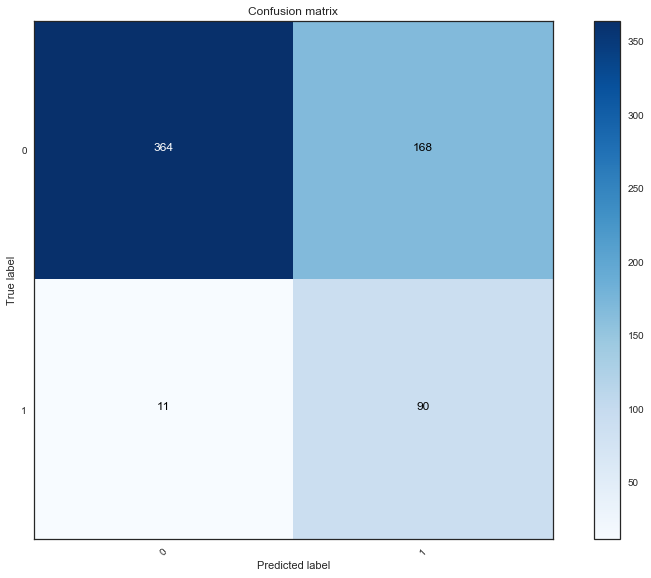

In [47]:
cm = confusion_matrix(y_test, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

**Here we can see that the classification of churn customers has increased to 90 from 68 by increasing the class weights**

In [48]:
print('Our accuracy based on the criterion above is ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 5 * cm[1][1]/(cm[1][0]+cm[1][1])) / 6))

Our accuracy based on the criterion above is 0.8621108556353266


**---------------------------------------------------------------------------------- End of own code -----------------------------------------------------------------------------------**

# Logistic Regression from scratch

Logistic regression is a classification algorithm used to assign observations to a discrete 
set of classes. Logistic regression transforms its output using the logistic sigmoid function to return a 
probability value which can then be mapped to two or more discrete classes.

Here ,we take equation of multiple linear equation and then tranform the output using the 
sigmoid function.
z=W0+W1*X(1)+W2*X(2)

In order to map predicted values to probabilities, we use the sigmoid function. 
The function maps any real value into another value between 0 and 1. In machine learning, 
we use sigmoid to map predictions to probabilities.


s(z)  = output between 0 and 1 (probability estimate)
z = input to the function (your algorithm’s prediction e.g. mx + b)
e = base of natural log

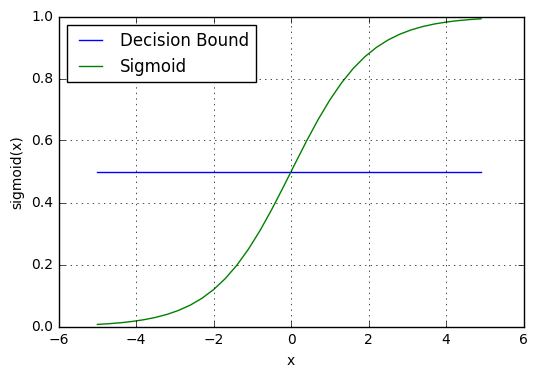

In [49]:
display(Image(filename='Sigmoid_Function.PNG'))

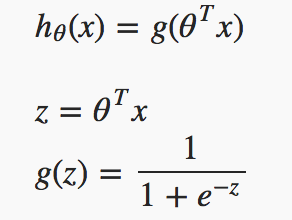

In [50]:
display(Image(filename='ThetaFunction.PNG'))

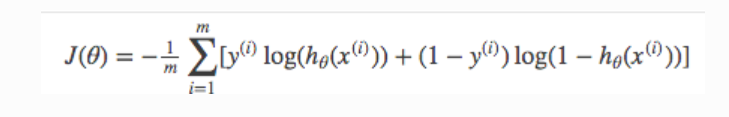

In [51]:
display(Image(filename='log1.PNG'))

Our goal is to minimize the loss function and the way we have to achive it is by increasing/decreasing the weights, i.e. fitting them. We will find the derivative of the loss function with respect to each weight. It tells us how loss would change if we modified the parameters.

The key thing to note is the cost function penalizes confident and wrong predictions more 
than it rewards confident and right predictions! The corollary is increasing prediction accuracy (closer to 0 or 1) 
has diminishing returns on reducing cost due to the logistic nature of our cost function.
Multiplying by y and (1−y) in the above equation is a sneaky trick that let’s us use the same equation to solve for
both y=1 and y=0 cases. If y=0, the first side cancels out. 
If y=1, the second side cancels out. In both cases we only perform the operation we need to perform.

Logic implemented : 

#N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (200, 3) to (3, 200)
    # So we can multiply w the (200,1)  cost matrix.(theta)
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)

    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr

    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights

In [52]:
#now we will apply logistic regression
X = data[['account_length', 'voice_mail_plan',  'international_plan', 'total_intl_charge']]
y = (data.churn != 0) * 1
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: churn, dtype: int32

Here, we select a threshold value or tipping point above 
which we will classify values into class 1 and below which we classify values into class 2.

The below part of code has been referred from https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac

**--------------------- Start of code referred from https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac --------------------**


In [53]:

class LogisticRegression:
    
    
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose=verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
   
    
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold):
        return self.predict_prob(X) >= threshold

In [54]:
model = LogisticRegression(lr=0.1, num_iter=300000)


In [55]:
%time model.fit(X, y)

C:\Users\Owner\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


Wall time: -5.27e+15 ns


In [56]:
pred=model.predict(X,threshold=0.5)

In [57]:
(pred==y).mean()

0.7563756375637564

In [58]:
model.theta

array([-1.51050513e+01, -2.71599933e-03, -2.37257558e+01,  1.22881914e+02,
        4.48324668e+00])

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
 model=LogisticRegression(C=1e20)

In [61]:
%time model.fit(X,y)

Wall time: 19.5 ms


LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
preds = model.predict(X)
(preds == y).mean()

0.8640864086408641

In [63]:
model.intercept_, model.coef_

(array([-2.62124076]),
 array([[ 8.24622831e-04, -8.17071258e-01,  1.75405443e+00,
          2.40677498e-01]]))

Here, If we trained our implementation with smaller learning rate and
more iterations we would find approximately equal weights.The model 
accuracy for logistic regression comes out to be 86.4 percent.

**--------------------End of code referred from https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac ------------------**


**Recommendations and Insights:**

1) Insight 1: For higher day call minutes, the churn rate is more. This means that there isn't any reduction in call charges for higher call duration. 
Recommendation: The company could take this into consideration and offer attractive plan with **low charges for higher minutes.**

2) Insight 2: It was seen that after the 3rd call the probability of a customer to churn increases.

Recommendation: The company should perform some data analysis on customer service feedback after the call. Also, **we need to have a special customer service representative to deal with the customers from the 2nd call and escalate this.**

3) Insight 3: People having international plan churn more, maybe the service of international calls might be poor that forces the customers to leave. From the churn population 30% were the ones with international plan. And 42% of the customers with international plans churned.

Recomendation: **Offer good the plans for the customer with international plans.** Check call quality and customer feedback to improve.

4) Recommendation and **future scope: We can use CLV and segment the customers and then identify the amount the company can spend in marketing and promotional offers to re acquire the customers in their respective segments.**

# Thank you!!!